In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('final_direct_train.csv')
valid = pd.read_csv('final_direct_valid.csv')

In [3]:
# train drop all the rows with a label = 4 
print(train.shape)
train = train[train['label'] != 4]
print(train.shape)

(516070, 25)
(503102, 25)


In [4]:
train_subset = train.sample(n=10000,random_state=42 , replace=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best cross-validation score:  0.8493750734271495
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       273
           1       0.74      0.71      0.72       118
           2       0.87      0.94      0.90       940
           3       0.67      0.45      0.54        22
           5       0.94      0.78      0.85       647

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.87      0.86      0.86      2000



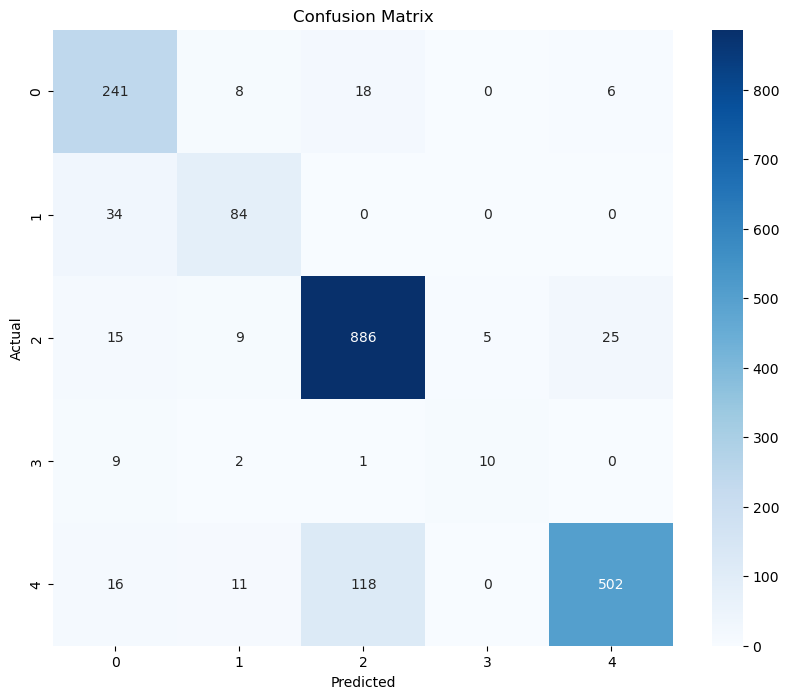

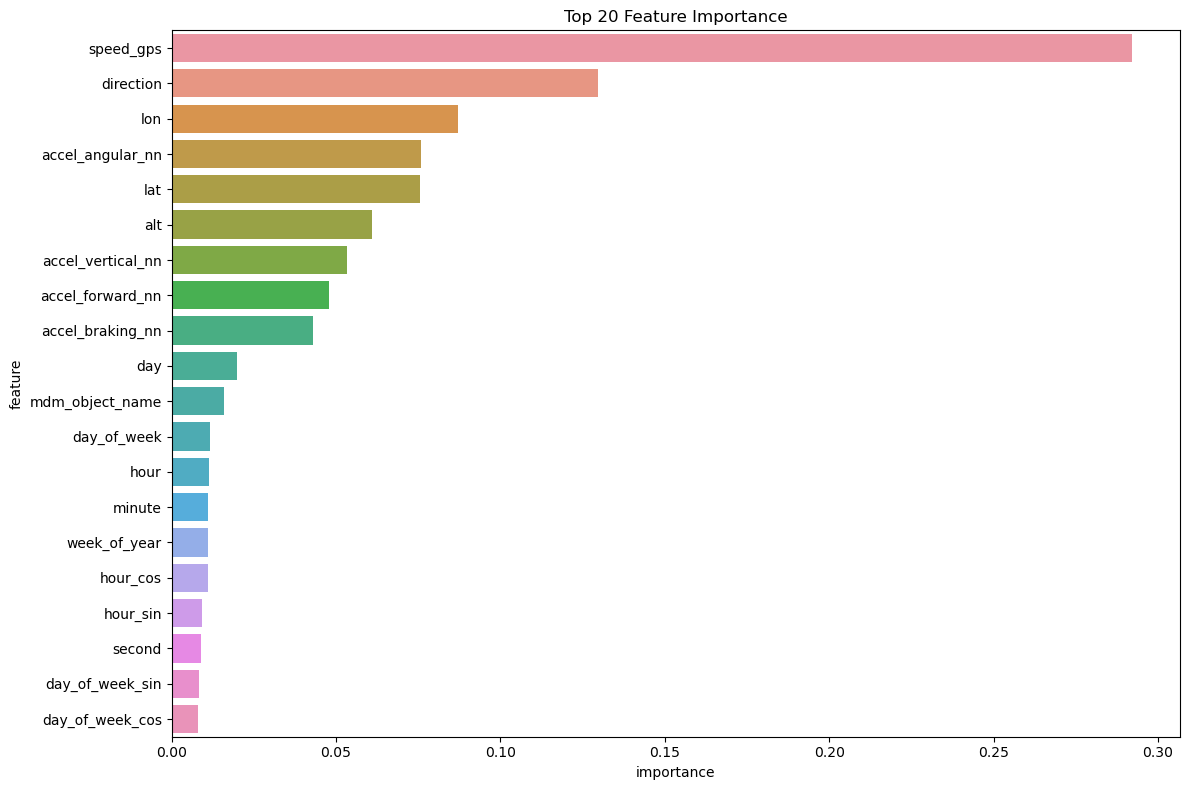

['best_random_forest_model.joblib']

In [8]:
# Separate features and target
from sklearn.model_selection import GridSearchCV


X = train_subset.drop(columns=['label', 'create_dt'])  # Assuming 'create_dt' is not needed as a feature
y = train_subset['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
scaler = scaler.fit(train.drop(columns=['label', 'create_dt']))  # Fit the scaler on the entire dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [400,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False],
    'criterion': ['gini', 'entropy'],  # Optional addition
    'class_weight': ['balanced', None]  # Optional addition
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the random search model
random_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                             cv=3, verbose=2, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Print classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Plot feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(best_model, 'best_random_forest_model.joblib')

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate F1 score and accuracy
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'macro' or 'micro' depending on your needs
accuracy = accuracy_score(y_test, y_pred)
score = max(0, 100 * f1)

# Print the scaled score
print("Scaled F1 Score (0-100): ", score)

# Print the results
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(y_test, y_pred))


Scaled F1 Score (0-100):  86.00810696192659
F1 Score:  0.8600810696192659
Accuracy:  0.8615
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       273
           1       0.74      0.71      0.72       118
           2       0.87      0.94      0.90       940
           3       0.67      0.45      0.54        22
           5       0.94      0.78      0.85       647

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.87      0.86      0.86      2000



In [10]:
X_full_test = train.drop(columns=['label', 'create_dt'])  # Assuming 'create_dt' is not needed as a feature
y_full_test = train['label']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
X_full_test_scaled = scaler.transform(X_full_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

# Make predictions on the test set
y_full_pred = best_model.predict(X_full_test_scaled)

# Calculate F1 score and accuracy
f1 = f1_score(y_full_test, y_full_pred, average='weighted')  # Use 'macro' or 'micro' depending on your needs
accuracy = accuracy_score(y_full_test, y_full_pred)
# Scale the F1 score to a 0-100 range
score = max(0, 100 * f1)

# Print the scaled score
print("Scaled F1 Score (0-100): ", score)
# Print the results
print("F1 Score: ", f1)
print("Accuracy: ", accuracy)

# Print the classification report for detailed metrics
print(classification_report(y_full_test, y_full_pred))


Scaled F1 Score (0-100):  85.49937079771544
F1 Score:  0.8549937079771545
Accuracy:  0.8560908125986381
              precision    recall  f1-score   support

           0       0.78      0.87      0.83     69216
           1       0.74      0.72      0.73     30780
           2       0.86      0.93      0.89    235251
           3       0.61      0.52      0.56      5016
           5       0.92      0.78      0.84    162839

    accuracy                           0.86    503102
   macro avg       0.78      0.76      0.77    503102
weighted avg       0.86      0.86      0.85    503102



In [12]:
# Prepare the features for the validation set
X_valid = valid.drop(columns=['create_dt'])  # Adjust if 'label' column exists
X_valid_scaled = scaler.transform(X_valid)

# Make predictions on the validation set
y_valid_pred = best_model.predict(X_valid_scaled)

# Create a submission DataFrame
submission_df = valid[['create_dt', 'mdm_object_name']].copy()  # Select required columns
submission_df['operation_kind_id'] = y_valid_pred  # Rename 'label' to 'operation_kind_id'

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.


In [16]:
sub = pd.read_csv('submission.csv')

In [17]:
sub1 = pd.read_csv('dataset/telemetry_for_operations_validation.csv')

In [18]:
print(sub1.shape)
print(sub.shape)

(260111, 12)
(260111, 3)


In [22]:
sub.dtypes

create_dt            object
mdm_object_name       int64
operation_kind_id     int64
dtype: object

In [23]:
import pandas as pd

# Example: Your DataFrames are sub1 and sub

# Perform a left merge on 'create_dt' and 'mdm_object_name'
final_sub = pd.merge(sub1, sub[['create_dt', 'mdm_object_name', 'operation_kind_id']], 
                     on=['create_dt', 'mdm_object_name'], 
                     how='left')

# Fill missing 'operation_kind_id' values with 4
final_sub['operation_kind_id'].fillna(0, inplace=True)

# If 'operation_kind_id' is supposed to be an integer, convert it
final_sub['operation_kind_id'] = final_sub['operation_kind_id'].astype(int)

# Save the result as a new CSV file
final_sub.to_csv('final_submission.csv', index=False)

print("Final submission saved as 'final_submission.csv'")


Final submission saved as 'final_submission.csv'
